# 題目：青少年純潔守護者—色情圖片辨識與馬賽克程式之結合應用
___

<img style="float: middle;" src="https://i.imgur.com/IKdyxo1.png" width="25%">

___
## 組員介紹：
### 1. 105104025 會計三 黃懷鈺 
### 2. 107701012 應數二 楊書瑋 
### 3. 106304013 統計三 吳昱弘  
### 4. 106104018 心理三 蔡秉翰

___
## 專案發想
為了守護青少年的純潔與童貞，導正良好的網路使用風氣，我們想設計一個能夠辨別色情圖片的色情守門員程式，希望能將被判斷為色情類別的圖片加上馬賽克後輸出，使其能實際應用於生活中，而非只是單純的課堂作業。

___
## 專案流程
### 我們將專案分成四個階段：
### (1) 資料蒐集與處理：
我們使用在GitHub上的NSFW_data_scraper作為本次專案的資料。下載完之後將圖片有雜訊的影像剔除，並建立訓練資料。
### (2) 模型建立及測試：
輸入：從NSFW data scraper的影像資料的五個類別中隨機挑選出總共4000張的訓練資料及測試資料，並透過data augmentation產生更多訓練資料及驗證資料以進行訓練。

輸出：輸出指定影像屬於5種類別的哪一個類別，並將被判斷為hentai及porn的影像加上馬賽克另存起來。

影像大小會設定在224x224
> 訓練資料共18000張，每個類別共有3600張。

> 測試資料約2000張，每個類別有400張

最後再使用Confusion matrix來觀看測試資料的準確程度，方便作為模型比較的基準。

#### 額外資料測試
在觀察訓練資料後，我們發覺訓練資料中*Porn*絕大部分為「異性戀」之間的「陰道交」為主，*Sexy*大多以「女性性感照」為主，所以想嘗試看看讀入四種例外資料圖片：男男性行為、女女性行為、肛交、屌照、男女性之胸部照片，來對模型進行額外測試。

### (3) 模型討論：
接下來我們將模型測試結果進行統整，分成以下四點來進行討論：


> 1. 測試資料、額外資料測試的總結果


> 2. 與原本GitHub上NSFW_data_scraper專案的模型比較


> 3. 兩個模型的比較


> 4. 專案研究限制與檢討


### (4) 結論與實作心得

___

## 專案實際排程與分工
<img style="float:middle;" src="https://i.imgur.com/8Qy9zKq.jpg" width="70%">

專案結果或過程中有使用的所有東西：https://github.com/tarogithubred/NCCU_Computer-Programming_Final-project
___

## 以下將呈現專案程式


---------------------------------------------------------------------------------------------

## (一) 資料來源
我們採用GitHub上的NSFW_data_scraper專案中整理出的影像資料作為本次專題的材料。

影像資料共有5個類別，請見下方表格：

圖片類別|圖片範例|
:------:|:----------------------:
Drawings|<img style="float: middle;" src="http://cdn.awwni.me/11wcd.jpg" width="20%">
Hentai|<img style="float: middle;" src="http://i.imgur.com/G47U9KC.jpg" width="20%">
Neutral|<img style="float: middle;" src="https://imgur.com/zDF6oiY.jpg" width="25%">
Porn|<img style="float: middle;" src="http://i.imgur.com/05lUV1G.jpg" width="25%">
Sexy|<img style="float: middle;" src="http://i.imgur.com/08fcHXL.jpg" width="25%">



為了下載該專案所使用的資料，我們使用該專案附上的程式，分別為:
> 使用1_get_urls_.sh檔取得影像的url連結。

> 使用2_downloads_from_urls_.sh檔下載影像。

> 使用4_optional_download_neutral_.sh檔案從其他資料庫取得neutral影像。

由於.sh檔案無法在jupyter notebook執行，因此直接附上程式檔案連結。
參考連結：https://github.com/alex000kim/nsfw_data_scraper/tree/master/scripts 

## (二) 資料前處理

在資料前處理的部份，同樣使用該NSFW專案附上的程式進行處理。

透過執行5_create_train_.sh檔案以建立我們的訓練資料（其實為原先下載好的影像），並將具有雜訊的影像資料移除。

參考連結：https://github.com/alex000kim/nsfw_data_scraper/tree/master/scripts 


## (三) 模型建立與測試

先前組內希望建立CaffeNet和GoogleNet進行色情圖片辨識，原因如下：


> 執行CaffeNet為使用一個GPU版本的AlexNet，一方面適合我們的電腦去執行，另一方面相較於其他的CNN network，CaffeNet在維持較低的模型參數設定之複雜性的同時，仍有相當好的表現。在F. Nian學者等人在2016年的研究中使用CaffeNet的CNN模型去辨識色情圖片並搭配data augmentation的方法後，辨識正確率達到98%，無data augmentation方法時，仍保持約95%的辨識正確率。


> GoogleNet的top 5 error中達到6.67%，非常接近人類水平的表現，且與AlexNet相比，參數數量從6000萬減少到400萬，大大減少模型總參數量。最後與VGG相比，googleNET訓練速度較快。


不過由於本團隊電腦的執行環境不適合執行CaffeNet，因此改用ResNet 50來當作本次模型的重點項目，原因如下：


>ResNet 為圖形辨識中經常使用的模型之一，較深層的ResNet 152贏得2015年ILSVRC挑戰，top-five error低於3.6%，表現亮眼。此外，在Surinta等人2019年的研究當中使用ResNet 50進行色情圖片辨識達到88%左右的正確率，表現相當不錯。


## 訓練第一個模型

___


## 1. Resnet 50
訓練完的模型：https://drive.google.com/open?id=1RsH_kRq9zbxT966XQbCS80RtU4t1M-NN

### (1)General Introduction of Resnet model
輸入：從NSFW data scraper的影像資料的五個類別中隨機挑選出總共4000張的訓練資料及測試資料，並透過data augmentation產生更多訓練資料及驗證資料以進行訓練。

輸出：輸出指定影像屬於5種類別的哪一個類別，並將被判斷為hentai及porn的影像加上馬賽克另存起來。

影像大小會設定在224x224
> 訓練資料共18000張，每個類別共有3600張。

> 測試資料約2000張，每個類別有400張


Loss function 為 categorical_crossentropy
Optimizers 為 SGD

參考資料：
https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/

### (2)ResNet簡易模型架構介紹


模型架構圖如下

(來源：https://www.researchgate.net/figure/ResNet-50-architecture-26-shown-with-the-residual-units-the-size-of-the-filters-and_fig1_338603223)

<img style="float:middle;" src="https://i.imgur.com/q96CpFP.png" width="80%">

### (3)建立模型前準備
建立resnet模型的自訂函式

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def get_resnet50(weights,IMAGE_SIZE,FREEZE_LAYERS,NUM_CLASSES,DROPOUT_RATE=0.5):
    net = ResNet50(weights=weights, include_top=False, input_tensor=None, input_shape=IMAGE_SIZE)
    x = net.output
    x = Flatten()(x)
    # 增加 DropOut layer
    if DROPOUT_RATE > 0:
        x = Dropout(DROPOUT_RATE)(x)
    # 增加 Dense layer，以 softmax 產生個類別的機率值
    x = BatchNormalization()(x)
    output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)
    # 設定凍結與要進行訓練的網路層
    net_final = Model(inputs=net.input, outputs=output_layer)
    for layer in net_final.layers[:FREEZE_LAYERS]:
        layer.trainable = False
    for layer in net_final.layers[FREEZE_LAYERS:]:
         layer.trainable = True

    return net_final

### (4)建立模型與訓練模型

In [ ]:
#讀取相關套件
import tensorflow as tf
import keras
from keras import backend as K
from keras import regularizers
from keras.models import Model, Sequential, load_model
from keras.activations import relu, softmax
from keras.layers import Input, BatchNormalization, Activation, Flatten, Dense, Dropout, \
GlobalMaxPooling2D, GlobalAveragePooling2D, Conv2D, MaxPooling2D, AveragePooling2D, Add
from block import block
from inceptionv4 import *
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import os

#取得硬體清單
gpus = tf.config.experimental.list_physical_devices('GPU')

#動態調整記憶體。如果需求記憶體超過限制，那就會拋出異常，並印出錯誤。
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


#設定模型檔案的位置
filepath="checkpoint/model_{epoch:03d}-{val_loss:.5f}.hdf5"

#使用保存點保存最好的model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, 
                            save_best_only=True)

#輸出資料到tensorboard
tbCallBack = TensorBoard(log_dir='logs',
                 histogram_freq=0,  
#                  batch_size=32,     
                 write_images=True,
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
# 資料路徑
DATASET_PATH  = './'

# 影像大小
IMAGE_SIZE = (224,224,3)

# 影像類別數
NUM_CLASSES = 5

# 設定Batch size
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 0

# Epoch 數
NUM_EPOCHS = 100

# 模型輸出儲存的檔案
WEIGHTS_FINAL = 'model.h5'

# 透過 data augmentation 產生訓練與驗證用的影像資料
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=0,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

# 輸出各類別的索引值
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))



#建立Resnet
net_final = get_resnet50(None,IMAGE_SIZE,FREEZE_LAYERS,NUM_CLASSES,0)
    
#設定optimizers
opt = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)

#編譯
net_final.compile(optimizer=opt,
                  loss='categorical_crossentropy', metrics=['accuracy'])
# 訓練模型
net_final.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        epochs = NUM_EPOCHS,
                        callbacks = [checkpoint,tbCallBack])

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

In [2]:
net_final.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

### (6)馬賽克自訂程式
為守護青少年的純潔，將針對hentai和porn兩種類別之建立馬賽克。
因此參考網頁的程式碼，建立可以
參考來源：https://quabr.com/55508615/how-to-pixelate-image-using-opencv-in-python

In [ ]:
import cv2
def pixelization(img):
    #取得影像的寬和高
    height, width = img.shape[:2]
    
    #設定馬賽克大小
    w, h = (32,32)

    # 將輸入大小調整為“像素化”大小
    temp = cv2.resize(img, (w, h), interpolation=cv2.INTER_NEAREST)

    # 初始化輸出影像
    output = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)
    return output

### (7)Confusion matrix自訂函式
為辨別模型的成效，因此建立confusion matrix
參考連結：https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html

In [4]:
from sklearn.metrics import confusion_matrix
import itertools
##繪製confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
##圖像化confusion matrix
def plot_graph(cnf_matrix,cls_list):
    np.set_printoptions(precision=5)


    # 繪製非常態confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list,
                      title='Confusion matrix, without normalization')

    # 繪製常態confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=cls_list, normalize=True,
                      title='Normalized confusion matrix')

### (8)使用測試資料評估模型辨識表現＋馬賽克+Confusion matrix
> 測試資料每個類別有400張影像


{drawings} inference running...

0


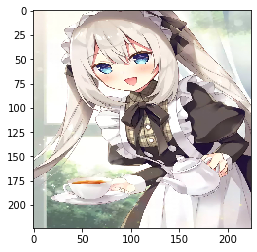

    1.000  drawings
    0.000  hentai
    0.000  neutral
    0.000  sexy
    0.000  porn

{hentai} inference running...

0


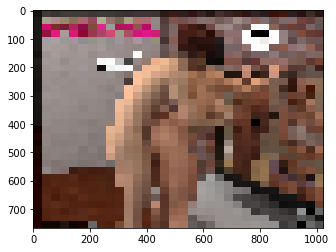

    1.000  porn
    0.000  hentai
    0.000  sexy
    0.000  drawings
    0.000  neutral

{neutral} inference running...

0


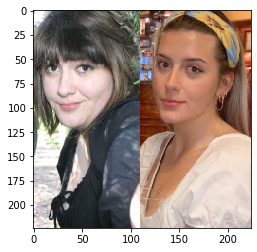

    1.000  neutral
    0.000  sexy
    0.000  drawings
    0.000  hentai
    0.000  porn

{porn} inference running...

0


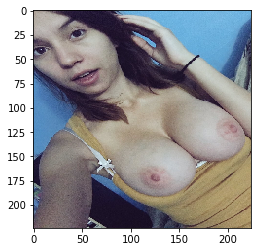

    1.000  sexy
    0.000  neutral
    0.000  hentai
    0.000  porn
    0.000  drawings

{sexy} inference running...

0


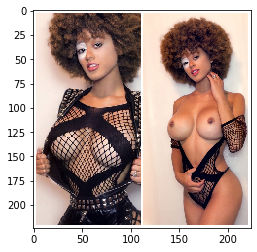

    0.573  sexy
    0.426  neutral
    0.000  porn
    0.000  hentai
    0.000  drawings


In [5]:
#讀取相關套件與建立好的模型
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
net = load_model("checkpoint/save/model-resnet50-final.h5")
y_pred=[]
y_true=[]
cls_list = ['drawings','hentai','neutral','porn','sexy']

#設定儲存位置
save_directory = "save_1"
#如果沒有該儲存位置則建立一個
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
#主工作區在test資料夾
main_directory = "test"

#設定每個類別資料夾中只會有100個影像被使用來測試
max_inference_per_class = 100

#設定每個類別只呈現一張影像
max_display_per_class = 1
print_enable=False

# 辨識每一張圖
for j in range(len(cls_list)):
    print("\n{"+cls_list[j]+"}"+" inference running...\n")
    directory = os.path.join(main_directory, cls_list[j])
    counter=0
    d_counter=0
    for f in os.listdir(directory):
        
        join_f = os.path.join(directory, f)
        #讀取影像
        img = image.load_img(join_f, target_size=(224,224))
        cv_image = cv2.imread(join_f)

        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        #預測圖像類別
        pred = net.predict(x)
        pred_argmax = pred.argmax()
        
        #如果預測的圖像類別為hentai或porn，則產生馬賽克影像。若否，則產生正常影像。
        if pred_argmax==1 or pred_argmax==3:
            new_img = pixelization(cv_image)
        else:
            new_img = cv_image
            
        save_path = os.path.join(save_directory, cls_list[j])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        photo_path = os.path.join(save_path, f)
        
        #將馬賽克或一般的影像寫到photo_path中
        cv2.imwrite(photo_path,new_img)

            
        if counter%100==0:
            print(counter)
        if print_enable:
            print('{:<120}'.format(f),end='\t')
            
        
        if d_counter<max_display_per_class:
            #如果預測預測的圖像類別為hentai或porn，則產生馬賽克影像，並呈現出來。
            if pred_argmax==1 or pred_argmax==3:
                new_img = pixelization(cv_image)
                new_img2 = new_img[:,:,::-1]
                imgplot = plt.imshow(new_img2)
                plt.show()
            #若否，則產生正常影像，並呈現出來。
            else:
                imgplot = plt.imshow(img)
                plt.show()                        
            top_inds = pred[0].argsort()[::-1][:5]
            for i in top_inds:
                print('    {:.3f}  {}'.format(pred[0][i], cls_list[i]))
        else:
            if print_enable:
                #印出預測結果
                print('{:>16}'.format("Result: ")+cls_list[pred_argmax])
        
        y_pred.append(pred_argmax)
        y_true.append(j)
        counter+=1
        d_counter+=1
        if counter>=max_inference_per_class:
            counter=0
            d_counter=0
            break

#confusion matrix

cnf_matrix = confusion_matrix(y_true, y_pred)

根據部分的結果顯示，可發現hentai和porn類別的範例照片出現明顯的辨識錯誤，大部分影像皆能透過模型而被正確判斷。

不過為了近一步了解模型的成效，因此繪製confusion matrix


Confusion matrix, without normalization
[[85  8  7  0  0]
 [14 81  3  1  1]
 [ 3  0 87  3  7]
 [ 0  2  7 86  5]
 [ 2  2 12  4 80]]

Normalized confusion matrix
[[0.85 0.08 0.07 0.   0.  ]
 [0.14 0.81 0.03 0.01 0.01]
 [0.03 0.   0.87 0.03 0.07]
 [0.   0.02 0.07 0.86 0.05]
 [0.02 0.02 0.12 0.04 0.8 ]]


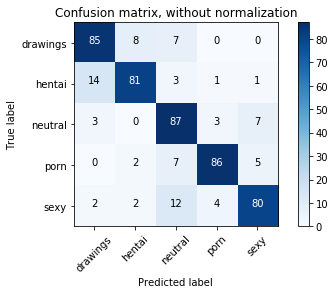

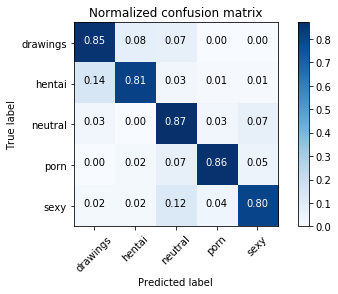

In [6]:
#繪製confusion matrix
plot_graph(cnf_matrix,cls_list)

### (9)ResNet小結


根據結果顯示，可以看到大致上resnet模型在辨別五種類別的資料時，保持在84上下的正確率，表現不錯。其中，sexy和hentai類別的資料的模型辨識正確率較低。這部分符合我們的預期，也許我們的模型在辨識porn影像時是透過判斷皮膚面積是否較大、是否出現生殖器、是否有人物疊合和是否有打開雙腿等情況進行辨識。但由於hentai與sexy類別中時常會出現較為裸露和煽情的畫面，可能導致模型辨識時將hentai與sexy的部分照片辨識為porn。

------------------------------------------------------------------------

## 訓練第二個模型，以進行模型之間的比較

為了搭配ResNet 50的使用，原本的GoogleNet也改成Inception-ResNet-V2模型。採用該模型的原因如下：


>選用Inception-ResNet-V2。此模型參考resnet網絡，在inception-V3的架構上進行變化。在2012年的ILSVRC分類中，Inception-ReNet-V2的準確度比ResNet或inpcetion-V3還要高，顯示當inceptionV3網路借助ResNet的架構，得以提升圖像辨識分類的表現。


參考資料：https://kknews.cc/zh-tw/tech/e4vr94.html

------------------------------------------------------------------------

## 2. InceptionResNetV2
訓練完的模型：https://drive.google.com/open?id=1Wy3Kl5SQZaBqSrRqiswRJjIO1FAUPQ-w

### (1)General Introduction of InceptionResNetV2 model
輸入：從NSFW data scraper的影像資料的五個類別中隨機挑選出總共4000張的訓練資料及測試資料，並透過data augmentation產生更多訓練資料及驗證資料以進行訓練。

輸出：輸出指定影像屬於5種類別的哪一個類別，並將被判斷為hentai及porn的影像加上馬賽克另存起來。


影像大小同樣設定在224x224
> 訓練資料共18000張，每個類別共有3600張。

> 測試資料約2000張，每個類別有400張


Loss function 為 categorical_crossentropy
Optimizers 為 SGD


### (2)Inception-ResNet-V2簡易模型架構


模型架構圖如下 


(來源：https://medium.com/@penolove15/improving-inception-and-image-classification-in-tensorflow-1e3c2ada4572)

<img style="float:middle;" src="https://i.imgur.com/cIwgyaI.png" width="70%">


#### 參數請參考下方net.summary()的部分

### (3)建立模型前準備
建立InceptionResNetV2模型的自訂函式

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalMaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def get_InceptionResNetV2(IMAGE_SIZE,FREEZE_LAYERS,NUM_CLASSES,DROPOUT_RATE=0.2):
    net = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=None, input_shape=IMAGE_SIZE)
    x = net.output
    x = Flatten()(x)


    # 增加 DropOut layer
    if DROPOUT_RATE > 0:
        x = Dropout(DROPOUT_RATE)(x)

    # 增加 Dense layer，以 softmax 產生個類別的機率值
    #x = Dense(128, activation='relu')(x)
    output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

    # 設定凍結與要進行訓練的網路層
    net_final = Model(inputs=net.input, outputs=output_layer)
    for layer in net_final.layers[:FREEZE_LAYERS]:
        layer.trainable = False
    for layer in net_final.layers[FREEZE_LAYERS:]:
         layer.trainable = True
  
    return net_final

### (4)建立模型與訓練模型

In [ ]:
#取得硬體清單
gpus = tf.config.experimental.list_physical_devices('GPU')

#動態調整記憶體。如果需求記憶體超過限制，那就會拋出異常，並印出錯誤。
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

#設定模型檔案的位置
filepath="checkpoint/model_{epoch:03d}-{val_loss:.5f}.hdf5"

#使用保存點保存最好的model
checkpoint = ModelCheckpoint(filepath, monitor='val_loss',verbose=1, 
                            save_best_only=True)

#輸出資料到tensorboard
tbCallBack = TensorBoard(log_dir='logs',
                 histogram_freq=0,  
#                  batch_size=32,     
                 write_images=True,
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
# 資料路徑
DATASET_PATH  = './'

# 影像大小
IMAGE_SIZE = (224,224,3)

# 影像類別數
NUM_CLASSES = 5

# 設定Batch size
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 0

# Epoch 數
NUM_EPOCHS = 100

# 模型輸出儲存的檔案
WEIGHTS_FINAL = 'model.h5'

# 透過 data augmentation 產生訓練與驗證用的影像資料
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=0,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/train',
                                                  target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                  target_size=(IMAGE_SIZE[0],IMAGE_SIZE[1]),
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

# 輸出各類別的索引值
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))



#建立InceptionResNetV2
net_final = get_InceptionResNetV2(None,IMAGE_SIZE,FREEZE_LAYERS,NUM_CLASSES,0)
    
#設定optimizers
opt = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)

#編譯
net_final.compile(optimizer=opt,
                  loss='categorical_crossentropy', metrics=['accuracy'])
# 訓練模型
net_final.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        epochs = NUM_EPOCHS,
                        callbacks = [checkpoint,tbCallBack])

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

### (5)讀取訓練好的模型

In [1]:
net = load_model("model-InceptionResNetV2.hdf5")

### (6)顯示InceptionResNetV2模型架構

In [3]:
net.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

batch_normalization_95 (BatchNo (None, 12, 12, 160)  480         conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 12, 12, 160)  0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 12, 12, 192)  208896      block17_4_ac[0][0]               
__________________________________________________________________________________________________
conv2d_96 (Conv2D)              (None, 12, 12, 192)  215040      activation_95[0][0]              
__________________________________________________________________________________________________
batch_normalization_93 (BatchNo (None, 12, 12, 192)  576         conv2d_93[0][0]                  
__________________________________________________________________________________________________
batch_norm

batch_normalization_155 (BatchN (None, 12, 12, 160)  480         conv2d_155[0][0]                 
__________________________________________________________________________________________________
activation_155 (Activation)     (None, 12, 12, 160)  0           batch_normalization_155[0][0]    
__________________________________________________________________________________________________
conv2d_153 (Conv2D)             (None, 12, 12, 192)  208896      block17_19_ac[0][0]              
__________________________________________________________________________________________________
conv2d_156 (Conv2D)             (None, 12, 12, 192)  215040      activation_155[0][0]             
__________________________________________________________________________________________________
batch_normalization_153 (BatchN (None, 12, 12, 192)  576         conv2d_153[0][0]                 
__________________________________________________________________________________________________
batch_norm

Total params: 59,252,709
Trainable params: 59,192,165
Non-trainable params: 60,544
__________________________________________________________________________________________________


### (7)使用測試資料評估Inception-ResNet-V2模型辨識表現＋馬賽克+Confusion matrix
> 測試資料每個類別有400張影像


{drawings} inference running...

0


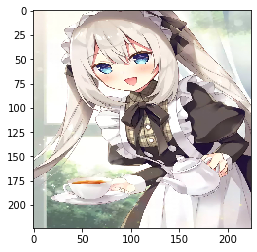

    0.982  drawings
    0.018  hentai
    0.000  neutral
    0.000  sexy
    0.000  porn

{hentai} inference running...

0


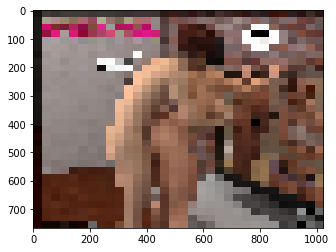

    0.429  porn
    0.353  sexy
    0.185  hentai
    0.022  neutral
    0.010  drawings

{neutral} inference running...

0


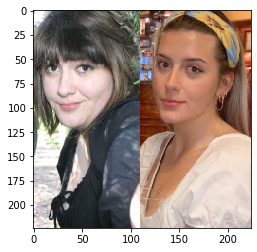

    0.992  neutral
    0.006  sexy
    0.001  porn
    0.001  hentai
    0.001  drawings

{porn} inference running...

0


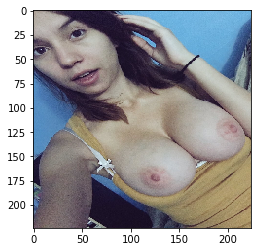

    0.994  sexy
    0.005  neutral
    0.001  porn
    0.000  hentai
    0.000  drawings

{sexy} inference running...

0


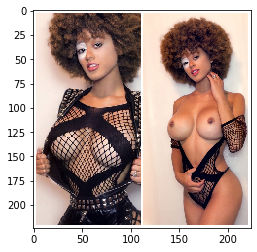

    0.631  neutral
    0.364  sexy
    0.003  hentai
    0.002  porn
    0.000  drawings


In [7]:
y_pred=[]
y_true=[]
cls_list = ['drawings','hentai','neutral','porn','sexy']

#設定儲存位置（將路徑更改成save_2，避免先前resnet的結果受影響）
save_directory = "save_2"
#如果沒有該儲存位置則建立一個
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
#主工作區在test資料夾
main_directory = "test"

#設定每個類別資料夾中只會有100個影像被使用來測試
max_inference_per_class = 100

#設定每個類別只呈現一張影像
max_display_per_class = 1
print_enable=False

# 辨識每一張圖
for j in range(len(cls_list)):
    print("\n{"+cls_list[j]+"}"+" inference running...\n")
    directory = os.path.join(main_directory, cls_list[j])
    counter=0
    d_counter=0
    for f in os.listdir(directory):
        
        join_f = os.path.join(directory, f)
        #讀取影像
        img = image.load_img(join_f, target_size=(224,224))
        cv_image = cv2.imread(join_f)

        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        #預測圖像類別
        pred = net.predict(x)
        pred_argmax = pred.argmax()
        
        #如果預測的圖像類別為hentai或porn，則產生馬賽克影像。若否，則產生正常影像。
        if pred_argmax==1 or pred_argmax==3:
            new_img = pixelization(cv_image)
        else:
            new_img = cv_image
            
        save_path = os.path.join(save_directory, cls_list[j])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        photo_path = os.path.join(save_path, f)
        
        #將馬賽克或一般的影像寫到photo_path中
        cv2.imwrite(photo_path,new_img)

            
        if counter%100==0:
            print(counter)
        if print_enable:
            print('{:<120}'.format(f),end='\t')
            
        
        if d_counter<max_display_per_class:
            #如果預測預測的圖像類別為hentai或porn，則產生馬賽克影像，並呈現出來。
            if pred_argmax==1 or pred_argmax==3:
                new_img = pixelization(cv_image)
                new_img2 = new_img[:,:,::-1]
                imgplot = plt.imshow(new_img2)
                plt.show()
            #若否，則產生正常影像，並呈現出來。
            else:
                imgplot = plt.imshow(img)
                plt.show()                        
            top_inds = pred[0].argsort()[::-1][:5]
            for i in top_inds:
                print('    {:.3f}  {}'.format(pred[0][i], cls_list[i]))
        else:
            if print_enable:
                #印出預測結果
                print('{:>16}'.format("Result: ")+cls_list[pred_argmax])
        
        y_pred.append(pred_argmax)
        y_true.append(j)
        counter+=1
        d_counter+=1
        if counter>=max_inference_per_class:
            counter=0
            d_counter=0
            break

#confusion matrix

cnf_matrix = confusion_matrix(y_true, y_pred)


根據辨識結果顯示，Resnet與Inception-ResNet-V2似乎沒有太大的差異。Inception的模型同樣在hentai和porn的範例照片有明顯的辨識錯誤。


此外，Inception的模型也在sexy的範例照片中辨識錯誤。這些結果似乎顯示我們訓練的Inception模型的辨識能力似乎比Resnet差。


### (8)Confusion matrix of Inception-ResNet-V2 model


Confusion matrix, without normalization
[[77 13 10  0  0]
 [ 9 88  1  1  1]
 [ 4  0 90  4  2]
 [ 0  0  4 92  4]
 [ 2  0 12  5 81]]

Normalized confusion matrix
[[0.77 0.13 0.1  0.   0.  ]
 [0.09 0.88 0.01 0.01 0.01]
 [0.04 0.   0.9  0.04 0.02]
 [0.   0.   0.04 0.92 0.04]
 [0.02 0.   0.12 0.05 0.81]]


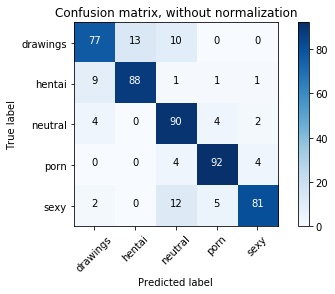

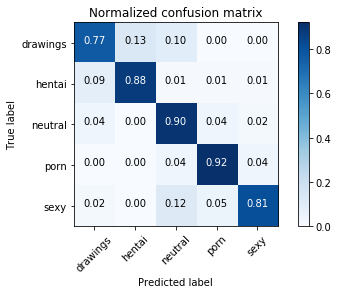

In [8]:
plot_graph(cnf_matrix,cls_list)

### (9)Inception-Resnet_V2小結


根據Confusion matrix的結果可以看到，雖然在drawing和sexy類別的影像辨識正確率只有約80%上下，但在其他類別中達到將近90%的正確率，比ResNet的表現稍微再好一些。


不過為何Inception模型在drawings的部分出現較低的辨識正確率是值得探討之處，但礙於作業時間之不足，本專案中不再就此現象進行討論。

-------------------------------------------------------------------------

## 3.例外資料測試
由於我們觀察訓練資料後，發覺訓練資料中*Porn*絕大部分為「異性戀」之間的「陰道交」為主，*Sexy*大多以「女性性感照」為主，所以想嘗試看看讀入四種例外資料圖片，：

### 例外資料分類標準是經由組內討論得出
>porn

    > 男男性行為（gay_porn) ：5張

    > 女女性行為 (lesbian_porn)：5張

    > 肛交（只呈現屁股與性器的交媾影像） (anal_intercourse)：5張

>sexy

    > 屌照 (penis_picture)：5張

    > 男生和女生胸部照片（boob_test)：5張


希望透過分析專案模型是否能正確分類其他未被涵蓋之資料，並根據不足之處在未來加以改進模型，守護青少年的純潔！

### (1)首先看inceptionV2對於例外資料的表現


{gay_porn} inference running...

0


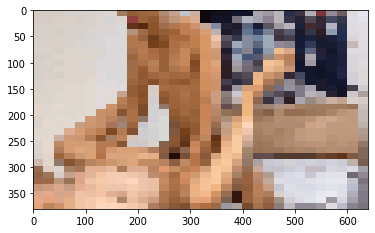

    0.994  porn
    0.004  sexy
    0.002  neutral
    0.000  hentai
    0.000  drawings


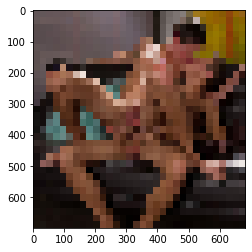

    0.999  porn
    0.001  sexy
    0.000  hentai
    0.000  neutral
    0.000  drawings


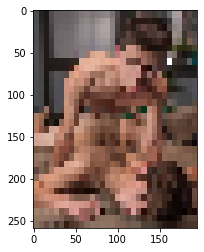

    0.998  porn
    0.002  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


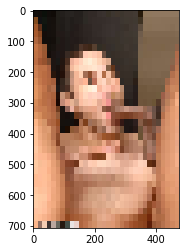

    0.998  porn
    0.001  sexy
    0.001  neutral
    0.000  hentai
    0.000  drawings


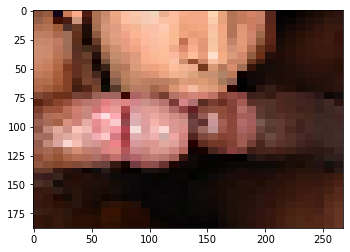

    0.992  porn
    0.003  neutral
    0.003  hentai
    0.001  sexy
    0.000  drawings

{lesbian_porn} inference running...

0


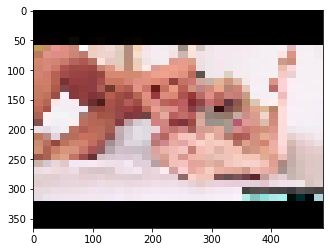

    0.992  porn
    0.006  hentai
    0.001  sexy
    0.001  neutral
    0.000  drawings


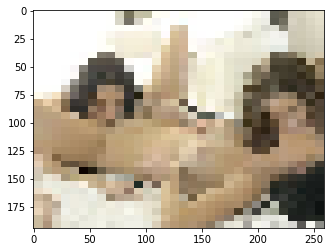

    0.992  porn
    0.006  sexy
    0.001  neutral
    0.001  hentai
    0.000  drawings


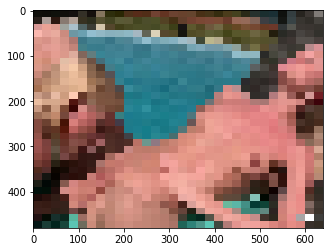

    0.773  porn
    0.166  sexy
    0.034  hentai
    0.026  neutral
    0.000  drawings


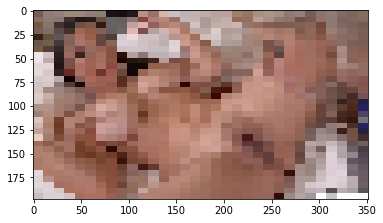

    0.916  porn
    0.074  sexy
    0.007  neutral
    0.003  hentai
    0.000  drawings


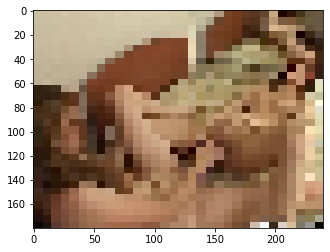

    0.982  porn
    0.013  sexy
    0.003  neutral
    0.001  hentai
    0.000  drawings

{anal_intercourse} inference running...

0


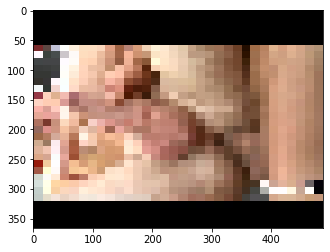

    0.999  porn
    0.001  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


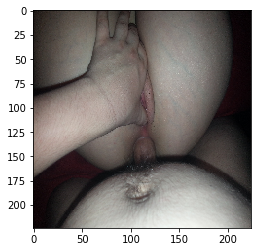

    0.860  sexy
    0.129  neutral
    0.008  porn
    0.003  hentai
    0.000  drawings


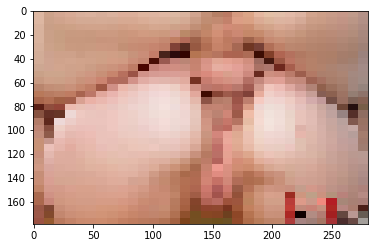

    0.511  hentai
    0.414  sexy
    0.072  porn
    0.003  neutral
    0.000  drawings


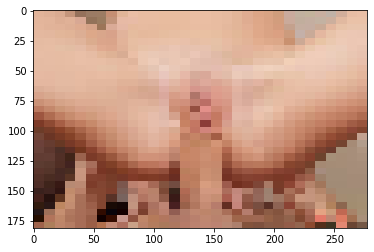

    0.986  porn
    0.009  hentai
    0.004  sexy
    0.001  neutral
    0.000  drawings


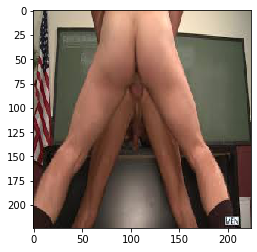

    0.740  sexy
    0.236  porn
    0.018  hentai
    0.005  neutral
    0.001  drawings

{penis_picture} inference running...

0


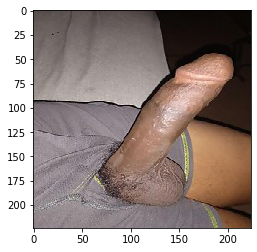

    0.673  neutral
    0.163  sexy
    0.161  porn
    0.003  hentai
    0.000  drawings


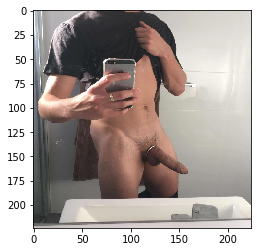

    0.960  sexy
    0.037  neutral
    0.004  porn
    0.000  hentai
    0.000  drawings


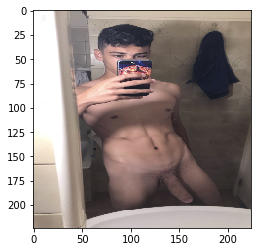

    0.941  sexy
    0.057  neutral
    0.001  hentai
    0.001  porn
    0.000  drawings


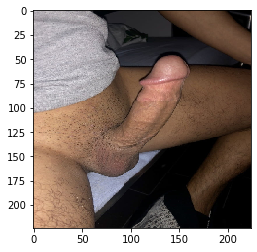

    0.521  neutral
    0.301  sexy
    0.175  porn
    0.002  hentai
    0.000  drawings


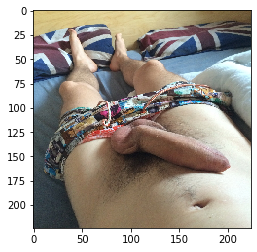

    0.930  sexy
    0.050  neutral
    0.020  porn
    0.000  hentai
    0.000  drawings

{boob_test} inference running...

0


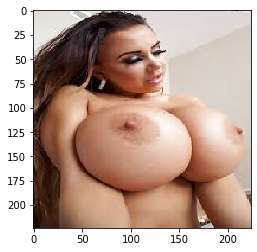

    0.635  sexy
    0.304  porn
    0.058  neutral
    0.003  hentai
    0.000  drawings


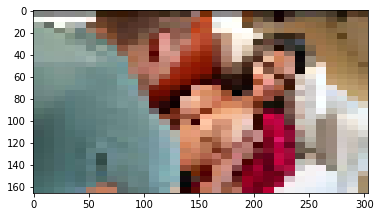

    0.977  porn
    0.021  sexy
    0.002  neutral
    0.000  hentai
    0.000  drawings


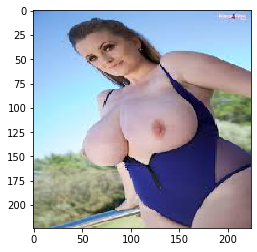

    0.975  sexy
    0.017  porn
    0.004  neutral
    0.003  hentai
    0.000  drawings


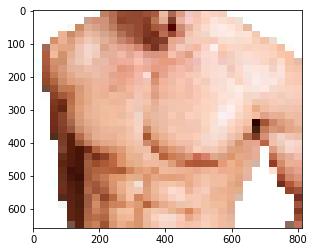

    0.510  porn
    0.411  sexy
    0.073  neutral
    0.005  hentai
    0.000  drawings


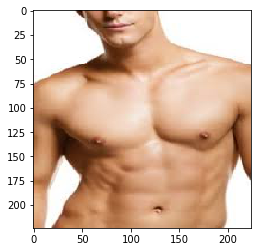

    0.774  neutral
    0.172  sexy
    0.035  porn
    0.012  hentai
    0.007  drawings


In [7]:
y_pred=[]
y_true=[]
cls_list = ['drawings','hentai','neutral','porn','sexy']
extreme_list = ['gay_porn','lesbian_porn','anal_intercourse','penis_picture','boob_test']

save_directory = "save_extreme"
#如果沒有該儲存位置則建立一個
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
#主工作區在test資料夾
main_directory = "test"

#設定每個類別資料夾中只會有100個影像被使用來測試
max_inference_per_class = 100

#設定每個類別只呈現一張影像
max_display_per_class = 5
print_enable=False

# 辨識每一張圖
for j in range(len(cls_list)):
    print("\n{"+cls_list[j]+"}"+" inference running...\n")
    directory = os.path.join(main_directory, cls_list[j])
    counter=0
    d_counter=0
    for f in os.listdir(directory):
        
        join_f = os.path.join(directory, f)
        #讀取影像
        img = image.load_img(join_f, target_size=(224,224))
        cv_image = cv2.imread(join_f)

        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        #預測圖像類別
        pred = net.predict(x)
        pred_argmax = pred.argmax()
        
        #如果預測的圖像類別為hentai或porn，則產生馬賽克影像。若否，則產生正常影像。
        if pred_argmax==1 or pred_argmax==3:
            new_img = pixelization(cv_image)
        else:
            new_img = cv_image
            
        save_path = os.path.join(save_directory, cls_list[j])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        photo_path = os.path.join(save_path, f)
        
        #將馬賽克或一般的影像寫到photo_path中
        cv2.imwrite(photo_path,new_img)

            
        if counter%100==0:
            print(counter)
        if print_enable:
            print('{:<120}'.format(f),end='\t')
            
        
        if d_counter<max_display_per_class:
            #如果預測預測的圖像類別為hentai或porn，則產生馬賽克影像，並呈現出來。
            if pred_argmax==1 or pred_argmax==3:
                new_img = pixelization(cv_image)
                new_img2 = new_img[:,:,::-1]
                imgplot = plt.imshow(new_img2)
                plt.show()
            #若否，則產生正常影像，並呈現出來。
            else:
                imgplot = plt.imshow(img)
                plt.show()                        
            top_inds = pred[0].argsort()[::-1][:5]
            for i in top_inds:
                print('    {:.3f}  {}'.format(pred[0][i], cls_list[i]))
        else:
            if print_enable:
                #印出預測結果
                print('{:>16}'.format("Result: ")+cls_list[pred_argmax])
        
        y_pred.append(pred_argmax)
        y_true.append(j)
        counter+=1
        d_counter+=1
        if counter>=max_inference_per_class:
            counter=0
            d_counter=0
            break


### Inception例外資料辨識結果


1. 根據結果顯示，Inception model在皆可準確辨識男男和女女性行為之porn照片。不過若照片為肛交時，模型則較難成功辨識，5張肛交照片中僅有一張成功辨識為porn。


2. 在sexy類別的照片中，屌照大致上能被成功辨識為sexy。不過在胸部的照片並沒有得到一致的結果。不一致的結果可能源自於sexy的訓練資料較少出現男性照片，抑或是裸露的胸部對於porn的辨識中佔有一席之地，使得模型容易產生錯誤辨識。

### (2)再來看Resnet 50 對例外資料的反應

In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
net = load_model("model-resnet50-final.h5")

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`



{gay_porn} inference running...

0


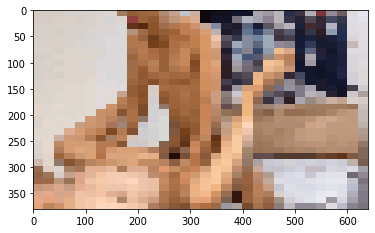

    1.000  porn
    0.000  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


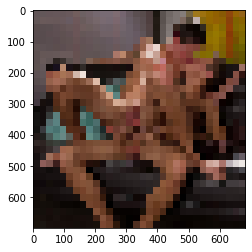

    1.000  porn
    0.000  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


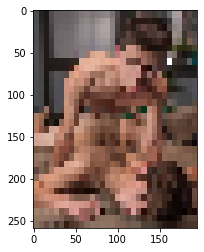

    1.000  porn
    0.000  neutral
    0.000  hentai
    0.000  sexy
    0.000  drawings


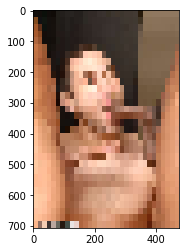

    1.000  porn
    0.000  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


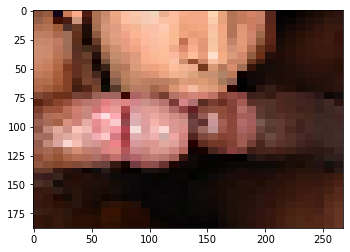

    0.977  porn
    0.023  neutral
    0.000  hentai
    0.000  sexy
    0.000  drawings

{lesbian_porn} inference running...

0


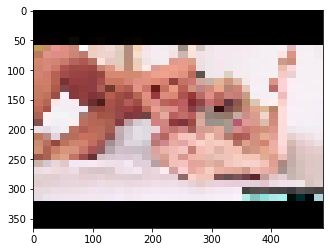

    0.964  porn
    0.024  hentai
    0.010  neutral
    0.002  drawings
    0.000  sexy


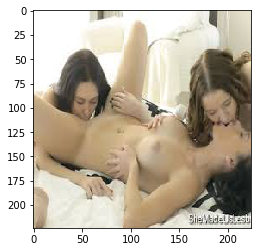

    0.975  neutral
    0.025  porn
    0.000  sexy
    0.000  hentai
    0.000  drawings


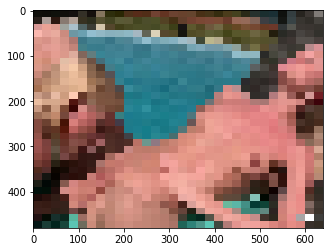

    0.471  hentai
    0.353  sexy
    0.165  porn
    0.011  neutral
    0.000  drawings


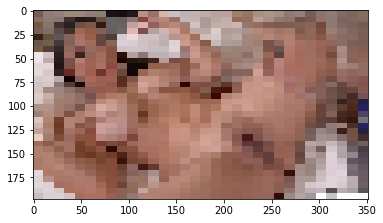

    0.995  porn
    0.005  sexy
    0.000  hentai
    0.000  neutral
    0.000  drawings


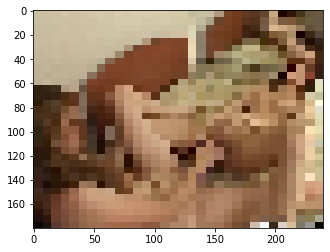

    0.902  porn
    0.098  neutral
    0.000  drawings
    0.000  hentai
    0.000  sexy

{anal_intercourse} inference running...

0


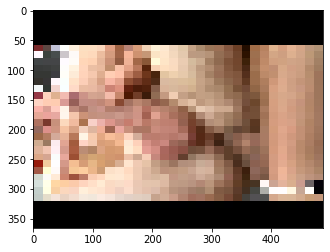

    0.986  porn
    0.009  neutral
    0.005  drawings
    0.000  sexy
    0.000  hentai


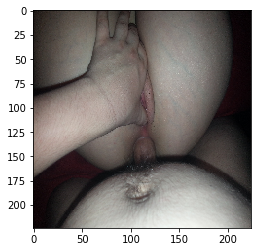

    0.989  sexy
    0.011  neutral
    0.000  porn
    0.000  hentai
    0.000  drawings


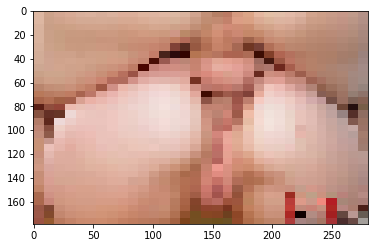

    0.975  porn
    0.018  hentai
    0.007  sexy
    0.000  neutral
    0.000  drawings


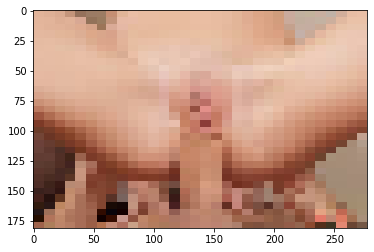

    0.967  porn
    0.028  neutral
    0.003  drawings
    0.002  hentai
    0.000  sexy


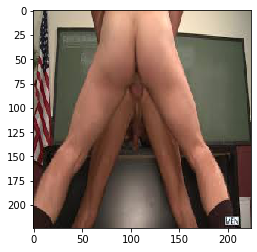

    0.981  sexy
    0.017  neutral
    0.002  drawings
    0.000  porn
    0.000  hentai

{penis_picture} inference running...

0


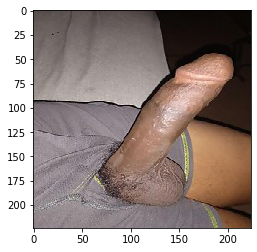

    0.743  sexy
    0.254  neutral
    0.002  hentai
    0.001  porn
    0.000  drawings


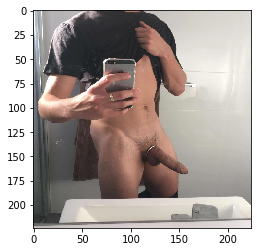

    0.998  sexy
    0.002  neutral
    0.000  porn
    0.000  drawings
    0.000  hentai


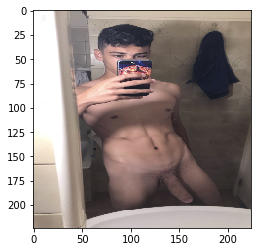

    0.981  sexy
    0.010  neutral
    0.009  hentai
    0.000  drawings
    0.000  porn


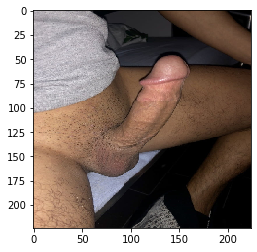

    0.983  sexy
    0.017  neutral
    0.000  drawings
    0.000  porn
    0.000  hentai


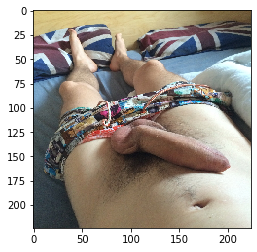

    0.976  sexy
    0.024  neutral
    0.000  hentai
    0.000  porn
    0.000  drawings

{boob_test} inference running...

0


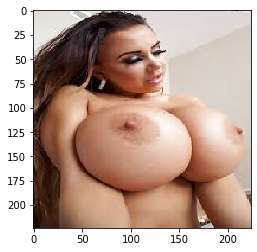

    0.990  sexy
    0.007  neutral
    0.002  porn
    0.000  hentai
    0.000  drawings


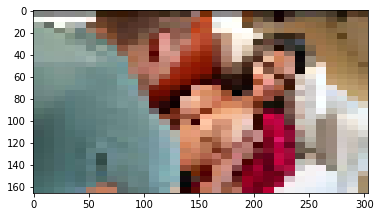

    0.737  porn
    0.261  neutral
    0.002  sexy
    0.000  hentai
    0.000  drawings


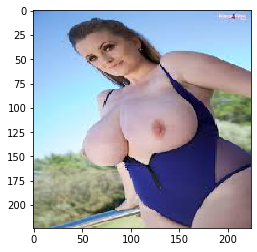

    0.970  sexy
    0.028  neutral
    0.002  hentai
    0.000  porn
    0.000  drawings


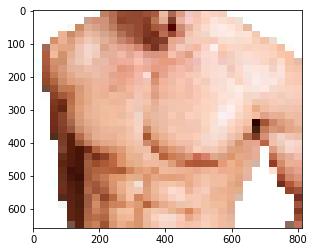

    0.870  porn
    0.130  sexy
    0.000  neutral
    0.000  hentai
    0.000  drawings


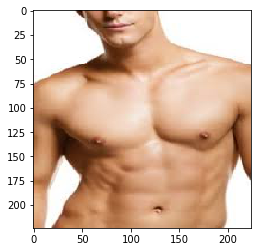

    1.000  sexy
    0.000  porn
    0.000  hentai
    0.000  neutral
    0.000  drawings


In [28]:
cls_list = ['drawings','hentai','neutral','porn','sexy']
extreme_list = ['gay_porn','lesbian_porn','anal_intercourse','penis_picture','boob_test']

save_directory = "save_extreme"
if not os.path.exists(save_directory):
    os.mkdir(save_directory)
main_directory = "extreme_test"
max_inference_per_class = 100
max_display_per_class = 5
print_enable=False
# 辨識每一張圖
for j in range(len(extreme_list)):
    print("\n{"+extreme_list[j]+"}"+" inference running...\n")
    directory = os.path.join(main_directory, extreme_list[j])
    counter=0
    d_counter=0
    for f in os.listdir(directory):
        
        join_f = os.path.join(directory, f)
        img = image.load_img(join_f, target_size=(224,224))
        cv_image = cv2.imread(join_f)

        if img is None:
            continue
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis = 0)
        pred = net.predict(x)
        pred_argmax = pred.argmax()
        if pred_argmax==1 or pred_argmax==3:
            new_img = pixelization(cv_image)
        else:
            new_img = cv_image
            
        save_path = os.path.join(save_directory, extreme_list[j])
        if not os.path.exists(save_path):
            os.mkdir(save_path)
        photo_path = os.path.join(save_path, f)
        
        cv2.imwrite(photo_path,new_img)

            
        if counter%100==0:
            print(counter)
        if print_enable:
            print('{:<120}'.format(f),end='\t')
        if d_counter<max_display_per_class:
            if pred_argmax==1 or pred_argmax==3:
                new_img = pixelization(cv_image)
                new_img2 = new_img[:,:,::-1]
                imgplot = plt.imshow(new_img2)
                plt.show()    
            else:
                imgplot = plt.imshow(img)
                plt.show()                        
            top_inds = pred[0].argsort()[::-1][:5]
            for i in top_inds:
                print('    {:.3f}  {}'.format(pred[0][i], cls_list[i]))
        else:
            if print_enable:
                print('{:>16}'.format("Result: ")+cls_list[pred_argmax])
        y_pred.append(pred_argmax)
        y_true.append(j)
        counter+=1
        d_counter+=1
        if counter>=max_inference_per_class:
            counter=0
            d_counter=0
            break
    

### ResNet例外資料辨識結果


1. 根據結果顯示，ResNet model在可準確辨識男男性行為照片，但在女女性行為照片中表現較Inception差。意外的是，當照片為肛交時，Resnet的表現較Inception好，5張肛交照片中3張成功辨識為porn。

2. 在sexy類別的照片中，屌照的表現Inception表現相似，皆能被成功辨識為sexy。胸部的部分似乎也沒有得到較為一致的結果，應顯示裸露胸部對於我們的情色辨識具有影響力。

## 4.總結果整理
### 1. 測試資料評估結果
整合confusion matrix的結果後，可以發現Inception在辨識Neutral、Hentai和Porn類別的照片時表現較ResNet優良。兩種模型在辨識Sexy上應無明顯的辨識正確率差異。另外，在Drawings的辨識上可發現ResNet表現較Inception好。



圖片類別|ResNet 50 accuracy (%)| Inception-ResNet-V2 accuracy (%)
:------:|:--------------------:|:----------------------:
Drawings|85|77
Neutral|87|90
Hentai|81|88
Porn|86|92
Sexy|80|81

### 2. 例外資料評估結果
就先前所述，例外資料部分可以看到Inception模型在辨識男男與女女性行為影像時表現比ResNet好。男性生殖器照片的辨識則是ResNet較好。最後肛交與胸部影像兩模型表現皆屬普通，兩模型判讀皆有不一致之結果。

圖片類別|ResNet 50 Correct dection (number of times) | Inception-ResNet-V2 (number of times
:------:|:--------------------:|:----------------------:
Porn-GayPorn|5|5
Porn-LesbianPorn|3|5 
Porn-anes|3|2 
Sexy-pennis|5|3 
Sexy-boobs|3|2 

## (四) 模型討論

### (1) 與NSFW_data_scraper專案結果（訓練資料每類別2000張）之比較

    根據過去NSFW專案結果，可以發現NSFW透過ResNet34所建立的模型，在辨識porn照片的準確率高達98%（1963/2000），總平均正確率約為91%，是相當不錯的準確率。

    以下NSFW的confusion matrix結果 
    
   <img style="float: middle;" src="https://i.imgur.com/Forix3r.jpg" width="50%">

    過去文獻提及使用data augmentation的方式能有效提升CNN模型辨識色情圖片之準確率（Olarik Surinta & Thananchai Khamkat, 2019)。因此，本團隊從resnet50出發並透過data augmentation的方式增加訓練與驗證資料，並透過callback產生得到最佳的模型權重。然而，結果並不如預期般有辨識正確率提升的情況。一方面可能是因為模型層數的不同，進而使結果不相同，另一方面可能是因為本專案並沒有使用NSFW data scraper中全部的影像資料，而是有先篩選資料並進行data augmentation。這兩種情況有可能是造成本專案結果與先前研究不一致的原因。

    雖然本專案沒有建立resnet34模型以研究操弄data augmentation的有無對於圖像辨識正確率的影響，但有嘗試訓練Inception-ResNet-V2這個於2016發表的新模型，希望得以得到高精度的模型。細看在辨識能力上，部分類別中Inception-ResNet-V2的確相較於ResNet 50有較高的準確率，但仍然不及於NSFW專案使用ResNet 34所跑出的結果。由於本專案兩模型除了建模以外，皆使用相同的方式建立訓練資料，或許本專案並沒有正確使用data augmentation的方式，進而使模型表現無法有顯著提升。礙於時間的限制，將交由後續研究進行探討。

### (2) 色情圖片專案辨識材料檢驗

ResNet 50 | Inception-ResNet-V2 
:------:|:--------------------:
![Imgur](https://i.imgur.com/w8QaKwx.jpg)|![Imgur](https://i.imgur.com/syew40Q.jpg)

    觀看ResNet和Inception模型的confusion matrix結果可以發現在模型在「hetai與drawings」類別之間和「sexy與neutral」之間相較於其他類別之間有較多confusion。雖然比例不大，但若能在圖片分類上有更嚴謹的標準，進而使不同類別的照片得以有較明確的區分，或許能提升本專案研究的表現。

    此外由於本團隊發現從NSFW_data_scraper下載之資料檔案中，porn大部分為男女之間的交媾行為，而sexy大部分為女性影像。因此，本團隊認為需加上更多類別影像（如男男性行為、女女性行為和男性生殖器官等）影像才得以更了解模型的表現。從結果上我們的確發現在肛交相關的影像，辨識正確率較低。此外，也發現到在辨識胸部影像的結果中有不一致的結果。關於胸部影像結果不一致的現象，或許又可以回朔到模型究竟透過何標準以辨識哪些影像為porn、哪些為sexy，抑或是哪些為neutral？了解造成此不一致結果現象的原因將協助我們加以改進現有模型。

### (3) 專案研究限制


1. 並沒有重新複製NSFW專案的結果，進而使得在模型比較時沒有一個客觀標準。
2. 資料分類上定義並沒有很明確，可能造成模型辨識相似類別中產生產生混淆。
3. 由於時間限制。例外資料之中，僅使用少量資料去評估模型表現，此部分結果之詮釋可能有所偏誤。

以上三點須在後續研究加以改進，已得到更好的模型結果

### (4) Inception-ResNet-V2在色情圖片辨識的未來發展


    根據團隊的搜尋，我們發現現今進行色情圖片辨識的研究尚未使用Inception-ResNet-V2，唯有一篇今年的會議論文提及會使用該模型進行後續研究（Mhd Wesam Al-Nabiki et al., 2020）。根據專案結果，本團隊認為Inception-ResNet-V2在色情圖片辨識上具有相當大的潛力，未來研究者可參考本專案結果，嘗試以該模型進行色情圖片辨識相關研究，進而設計相關軟體，以避免未滿18歲者過早接觸情色影音媒體。






## (五) 結論與實作心得

### 結論

透過這次專案，雖然我們建立的模型準確率與原本專案的準確率有落差，但是卻無心插柳，不小心成為使用Inception-ResNet-V2辨識色情圖片的領頭羊，也認為其在色情圖片辨識上有相當大的潛力，期待我們在未來能繼續進行研究，潛心學習尋找更好的模型，為色情圖片辨識盡心盡力，守護青少年的純潔。

### 各組員的實作心得


● 懷鈺：這次專案從初期到資料整理就開始卡關，跟組員花了兩週才把上萬筆資料下載下來，接下來是建模的部分，我負責的是CaffeNet，但因爲電腦跑不動還有各種電腦環境因素而改成resnet，跟朋友請教後才完成，學到了要完成一個專案真的需要花很多時間跟團隊合作。


● 書瑋：這次專案讓我瞭解到整個過程的艱辛，從一開始的資料整理到後來的建模及訓練，每個階段都需要花費許多時間，有時候在執行好幾個小時後出現錯誤也是常有的，但仍要不斷改進，想辦法解決面臨到的問題，也謝謝組員的幫忙，一起解決面臨的問題，最後才能完成這個專案。


● 昱弘：身為專案的提案人，開始做專案之後才知道，原來光是上課習以為常的讀入資料集這個動作，就要花費大量的心力了，我們光是下載資料到整理就花費了大量的時間，甚至資料轉換轉一轉電腦還記憶體裝滿直接死當關掉，硬體設備完全不能撐起我們的野心(?)。最後謝謝懷鈺朋友的電腦，沒有它我們不可能完成專案，也感謝大家的幫忙，願意完成我的提案，真的大大感謝你們。


● 秉翰：專案過程相當辛苦，在程式與電腦硬體上處處碰壁，光是在資料搜集與處理上，似乎就花了快兩週的時間了吧！不過，在這期間不斷的嘗試與錯誤，的確感覺到自己在程式掌握度有所成長，也更了解機器學習的學術領域。超級感謝全體組員努力不懈，超謝謝電腦硬體的支援！！！

___
## 參考文獻

1. Surinta, Olarik & Khamket, Thananchai. (2019). Recognizing Pornographic Images using Deep Convolutional Neural Networks. 10.1109/ECTI-NCON.2019.8692296.


2. Fudong Nian, Teng Li, Yan Wang, Mingliang Xu, Jun Wu. (2016).Pornographic image detection utilizing deep convolutional neural networks,Neurocomputing, Volume 210, 283-293.
